In [1]:
import os
import numpy as np
import pandas as pd
import uproot as ur

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'gold', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']

In [15]:
# trk pt bins
trk_pt_lo = [0, 1, 2, 5]
trk_pt_hi = [1, 2, 5, 20]

jet_pt_lo = [5, 10, 20]
jet_pt_hi = [10, 20, 40]
jet_pt_sel = 1

def findbin(h_axis, value):
    edges = h_axis.edges()
    for i in range(len(edges)-1):
        if edges[i] <= value and value < edges[i+1]:
            return i
    return len(edges)-1

def yslice(th2d, bin_lo, bin_hi):
    h_slice = th2d.T[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionXY(h):
    return np.sum(h, axis=2)

def xslice(th2d, bin_lo, bin_hi):
    h_slice = th2d[bin_lo:bin_hi]
    return np.sum(h_slice, axis=0)

def projectionX(h):
    if len(h.shape) == 3:
        return np.sum(projectionXY(h), axis=1)
    return np.sum(h, axis=1)

def projectionY(h):
    if len(h.shape) == 3:
        return np.sum(projectionXY(h), axis=0)
    return np.sum(h, axis=0)

def projectionZ(h):
    return np.sum(np.sum(h, axis=0), axis=0)

def rebin(h, nbins):
    if len(h) % nbins != 0:
        return 0
    return [np.sum(h[nbins*i:nbins*(i+1)]) for i in range(int(len(h) / nbins))]
    


[1 2 3 4 5 6]
[6, 15]


(5, 10)
Njets : 70205.0
49.94772377676642
7.227975107735273
10.375329237888959
22.174488666084592
7.276119826054967
2.7149063052466165
(10, 20)
Njets : 6623.0
529.4549219006321
76.61784575548164
109.98036979405019
235.0535975845491
77.12818849285657
28.77849874072757
(20, 40)
Njets : 517.0
6782.553090421444
981.5086894362763
1408.897464499022
3011.1411543568056
988.046406940404
368.66537168247334
[[70205.0, 6623.0, 517.0], [114887.0, 10579.0, 821.0], [70205.0, 6623.0, 517.0]]
(5, 10)
Njets : 114887.0
10.532718949650654
6.004291083594799
2.8402908522075165
1.6515793533870604
0.032140276488875706
0.004156257826252715
(10, 20)
Njets : 10579.0
114.38439190552175
65.20606765487813
30.845306280136583
17.9360050262387
0.3490405468359451
0.045136590687654375
(20, 40)
Njets : 821.0
1473.9007088532458
840.2131421692517
397.4573631395431
231.11449107500513
4.497563879387897
0.5816077867048668
[[70205.0, 6623.0, 517.0], [114887.0, 10579.0, 821.0], [70205.0, 6623.0, 517.0], [114887.0, 10579.0, 821.

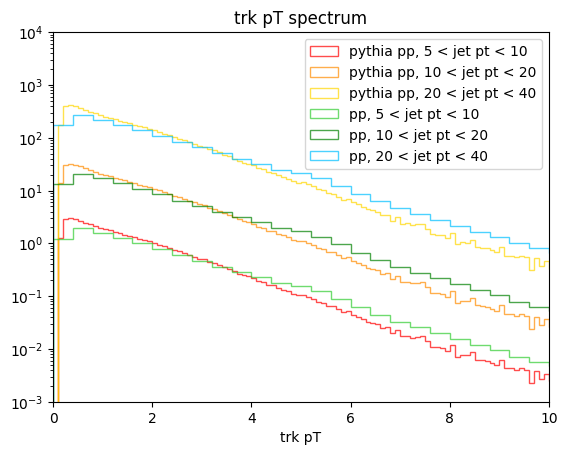

In [16]:
base_dir = "/global/cfs/cdirs/alice/kdevero/"
#fs = [base_dir+"pp_jet-trk/19012324/merged.root"]#, "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
fs = ["./pythia/pt5_R0p4_s5p02.root", base_dir+"pp_jet-trk/19162010/merged.root"] #, "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
#fs = ["./output_data/AnalysisResults.root"]
f_names = ["pythia pp", "pp", "Pb+Pb, 0-5%", "Pb+Pb, 40-50%"]

n_jetpt = "h_jet_pt_JetPt_R0.4_0.15"
n_shape_pt = "h_jet-trk_shape_RL_TrkPt_JetPt_R0.4_0.15"
n_shape_z = "h_jet-trk_shape_RL_z_JetPt_R0.4_0.15"

for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    N_jets_pt = []
    for jetpti in range(len(jet_pt_lo)):
        h = f[n_jetpt]
        h_jetpt = h.to_numpy()[0]
        pt_range = (findbin(h.axis("x"), jet_pt_lo[jetpti]), findbin(h.axis("x"), jet_pt_hi[jetpti]))
        print(pt_range)

        h_jetpt = xslice(h_jetpt, pt_range[0], pt_range[1])
                        
        N_jets = np.sum(h_jetpt)
        print("Njets : " + str(N_jets))
        N_jets_pt.append(N_jets)
        
        h = f[n_shape_pt]
        bin_edges = h.axis("y").edges()
        bin_width = bin_edges[1] - bin_edges[0]
        h_numpy = h.to_numpy()[0]
        this_slice = projectionY(h_numpy)
        this_slice = this_slice / (bin_width * N_jets)
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi+jetpti], label=f_names[fi] + ", {} < jet pt < {}".format(jet_pt_lo[jetpti], jet_pt_hi[jetpti]))

        print(np.sum(this_slice))

        slices = [(0, 4), (4, 8), (8, 24), (24, 40), (40, 80)]
        for slici in slices:
            print(np.sum(this_slice[slici[0] : slici[1]]))
    
    N_jets_f_pt.append(N_jets_pt)
    print(N_jets_f_pt)
    
    """
    h = f["h_trkpt"]
    this_slice = np.sum(h.values().reshape(-1,2), axis=1)[:80]
    print(len(this_slice))
    print(len(bin_edges))
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[0])
    
    print(np.sum(this_slice))
    
    slices = [(0, 4), (4, 8), (8, 24), (24, 40), (40, 80)]
    for slici in slices:
        print(np.sum(this_slice[slici[0] : slici[1]]))
    """

plt.legend()
plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 10)
plt.ylim(1E-3, 1E4)
#plt.xscale('log')
plt.yscale('log')
plt.show()


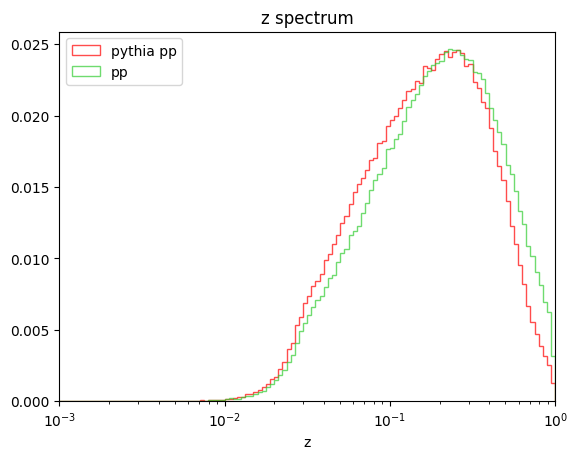

In [4]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("y").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionY(h_numpy)
    this_slice = this_slice / np.sum(this_slice)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi], label=f_names[fi])
    
    plt.title("z spectrum") 
    plt.legend(loc="upper left")
    plt.xlabel('z')
    plt.xlim(1e-3, 1)
    plt.xscale('log')
    #plt.yscale('log')
plt.show()
    

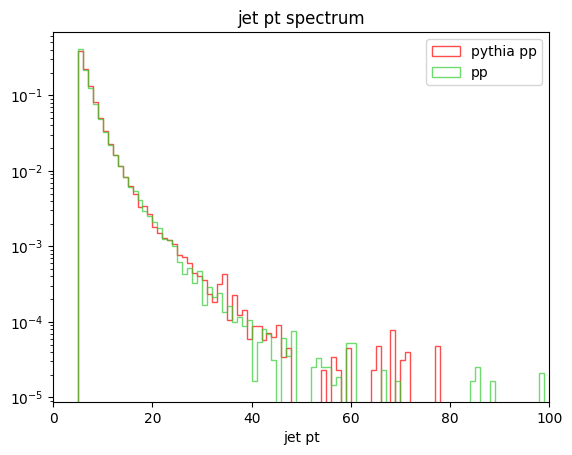

In [5]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("z").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionZ(h_numpy)
    this_slice = this_slice / np.sum(this_slice)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi], label=f_names[fi])
    
    plt.title("jet pt spectrum") 
    plt.xlabel('jet pt')
    plt.legend(loc="upper right")
    plt.xlim(0, 100)
    #plt.xscale('log')
    plt.yscale('log')
plt.show()
    

In [6]:
h_jetpt = []
h_shape_pt = []
h_shape_pt_np = []
h_shape_z = []
h_shape_z_pt = []

for fi in range(len(fs)):
    f = ur.open(fs[fi])

    # jet pt histogram
    h = f[n_jetpt]
    pt_range = (findbin(h.axis("x"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("x"), jet_pt_hi[jet_pt_sel]))
    print(pt_range)
    
    h = h.to_numpy()[0]
    h = xslice(h, pt_range[0], pt_range[1])
    h_jetpt.append(h)
    print("Njets : " + str(np.sum(h)))

    # R, trk pt, jet pt histogram
    h = f[n_shape_pt]
    h_shape_pt.append(h)
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))

    h = h.to_numpy()[0]
    h_shape_pt_np.append(h[:, :, pt_range[0]:pt_range[1]])

    # R, trk pt, jet pt histogram
    h_shape_z = f[n_shape_z]



(10, 20)
Njets : 6623.0
(10, 20)
Njets : 10579.0


(0, 10)
13451.0
(10, 20)
10580.0
(20, 50)
12214.0
(50, 200)
3294.0
(0, 2)
12461.0
(2, 5)
16902.0
(5, 12)
16316.0
(12, 50)
7582.0


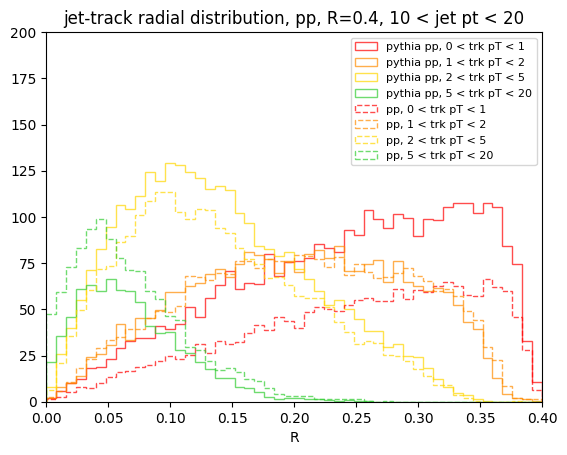

In [21]:
for fi in range(len(fs)):
    bin_edges = h_shape_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = projectionXY(h_shape_pt_np[fi])
    integrals = []
    h_trk = []
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[i]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)

        this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
        print(np.sum(this_slice))
        this_slice = this_slice / (N_jets_f_pt[fi][jetpti] * bin_width)

        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[i], label='{}, {} < trk pT < {}'.format(f_names[fi], trk_pt_lo[i], trk_pt_hi[i]))
        h_trk.append(this_slice)

plt.legend(loc='upper right', prop={'size': 8})
plt.title("jet-track radial distribution, " + f_names[fi] + ", R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 200)
#plt.ylim(0, 0.5)
plt.show()


In [8]:
"""
h = f[n_shape_pt]
bin_edges = h.axis("x").edges()
bin_width = bin_edges[1] - bin_edges[0]

for fi in range(1,len(fs)):
    for j in range(len(trk_pt_lo)):
        
        h_to_graph = hs[fi][j] - hs[0][j]

        plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[j], label='{} < trk pT < {}'.format(trk_pt_lo[j], trk_pt_hi[j]))
    
    plt.axhline(0, linestyle='--', color='gray')
    plt.legend(loc='lower right')
    plt.title("radial distribution, " + f_names[fi] + " - pp, R=0.4, 100 < jet pt < 110") 
    plt.xlabel('R')
    plt.xlim(0, 0.4)
    plt.ylim(-20, 20)
    plt.show()
"""    

[    0.   140.   453.   891.  1479.  2210.  2983.  3871.  4855.  5810.
  6825.  7838.  8861.  9958. 11021. 12114. 13159. 14228. 15321. 16419.
 17433. 18463. 19425. 20426. 21326. 22296. 23208. 24142. 25090. 25976.
 26889. 27779. 28632. 29528. 30411. 31191. 32056. 32838. 33568. 34302.
 35013. 35726. 36407. 37045. 37636. 38179. 38667. 39033. 39350.]
[    0.   379.   963.  1781.  2823.  4034.  5412.  6782.  8196.  9623.
 11136. 12672. 14248. 15778. 17235. 18696. 20211. 21640. 23047. 24430.
 25799. 27129. 28444. 29697. 30971. 32190. 33373. 34598. 35821. 36976.
 38107. 39158. 40224. 41270. 42274. 43240. 44259. 45245. 46205. 47116.
 47983. 48866. 49676. 50393. 51061. 51691. 52248. 52699. 53016.]


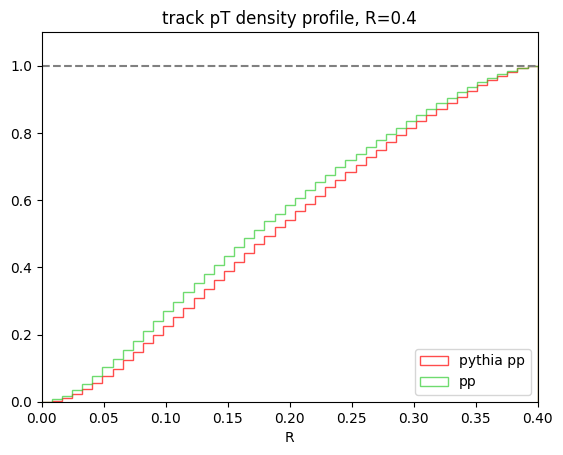

'\nfor i in range(1,len(fs)):\n    h_to_graph = np.where(hs[0] != 0, np.divide(hs[i], hs[0]), 0)\n    \n    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = \'step\', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i] + " - pp")\n    \nplt.axhline(1, linestyle=\'--\', color=\'gray\')\nplt.legend(loc=\'upper right\')\nplt.title("track pT density profile, PbPb - pp, R=0.4") \nplt.xlabel(\'R\')\nplt.xlim(0, 0.4)\nplt.show()\nprint(integrals)\n'

In [28]:
hs = []
for fi in range(len(fs)):
    n_r_bins = 50
    bin_edges = np.linspace(0, 0.4, 50)
    bin_widths = 0.4 / n_r_bins

    integrals = []
    
    h_to_graph = np.array([np.sum(projectionX(h_shape_pt_np[fi])[:i]) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    hs.append(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi], label=f_names[fi])
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()


"""
for i in range(1,len(fs)):
    h_to_graph = np.where(hs[0] != 0, np.divide(hs[i], hs[0]), 0)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i] + " - pp")
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='upper right')
plt.title("track pT density profile, PbPb - pp, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.show()
print(integrals)
"""

(0, 10)
(10, 20)
(20, 50)
(50, 200)
(0, 2)
(2, 5)
(5, 12)
(12, 50)


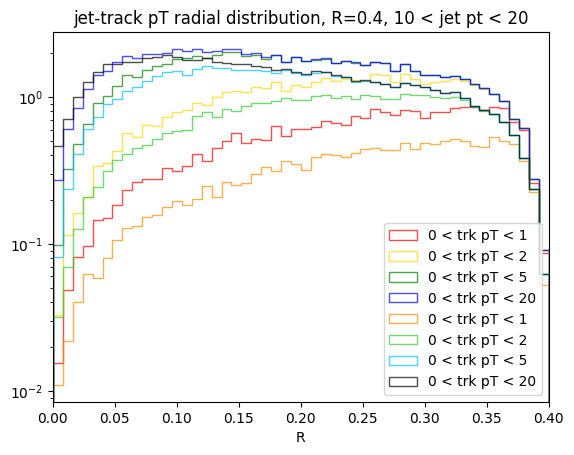

In [40]:
for fi in range(len(fs)):
    
    bin_edges = h_shape_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    hnumpy = projectionXY(h_shape_pt_np[fi])
    
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[i]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)
        
        this_slice = yslice(hnumpy, 0, trk_pt_range[1])
        integrals.append(np.sum(this_slice))
        this_slice = this_slice / N_jets_f_pt[fi][jetpti]
        
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[2*i+fi], label='{} < trk pT < {}'.format(0, trk_pt_hi[i]))
    
plt.legend(loc='lower right')
plt.title("jet-track pT radial distribution, R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e0, 3e3)
plt.show()